Hello

# Q3.1

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.iaml01cw2_helpers import *
from templates.iaml01cw2_my_helpers import *
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

c_Xtrn,c_Ytrn,c_Xtst,c_Ytst = load_CoVoST2("data")

from sklearn.cluster import KMeans

km = KMeans(n_clusters=22, random_state=1).fit(c_Xtrn)
sum_31 = km.inertia_

pr_31 = km.predict(c_Xtrn)

def find_clus(pr_31, set_):
    samples = np.array([])
    for i in pr_31:
        if i == set_:
            samples = np.append(samples, i)
        
    return samples.size

def find_yes(X, Y, c):
    samples = X[np.argwhere(Y == c)]
    samples = samples.reshape(samples.shape[0],samples.shape[2])
    return samples

km_centers = km.cluster_centers_

cluster_result = np.array([])
for i in range(22):
    d = find_clus(pr_31, i)
    cluster_result = np.append(cluster_result, d)
    
li_lan = ['0  Arabic (Ar)',
'1  Catalan (Ca)',
'2  Welsh (Cy)',
'3  German (De)',
'4  English (En)',
'5  Spanish (Es)',
'6  Estonian (Et)',
'7  Persian (Fa)',
'8  French (Fr)',
'9  Indonesian (Id)',
'10 Italian (It)',
'11 Japanese (Ja)',
'12 Latvian (Lv)',
'13 Mongolian (Mn)',
'14 Dutch (Nl)',
'15 Russian (Ru)',
'16 Slovenian (Sl)',
'17 Swedish (Sv)',
'18 Portuguese (Pt)',
'19 Tamil (Ta)',
'20 Turkish (Tr)',
'21 Chinese (Zh)']

def iaml01cw2_q3_1():
    table = np.column_stack((np.array(li_lan).reshape(-1,1),cluster_result.reshape(-1,1)))

    for i in table:
        print(i[0], '&', i[1], '\\\\ \hline')
    
iaml01cw2_q3_1()

D:\Python\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


0  Arabic (Ar) & 1018.0 \\ \hline
1  Catalan (Ca) & 1125.0 \\ \hline
2  Welsh (Cy) & 1191.0 \\ \hline
3  German (De) & 890.0 \\ \hline
4  English (En) & 1162.0 \\ \hline
5  Spanish (Es) & 1332.0 \\ \hline
6  Estonian (Et) & 839.0 \\ \hline
7  Persian (Fa) & 623.0 \\ \hline
8  French (Fr) & 1400.0 \\ \hline
9  Indonesian (Id) & 838.0 \\ \hline
10 Italian (It) & 659.0 \\ \hline
11 Japanese (Ja) & 1276.0 \\ \hline
12 Latvian (Lv) & 121.0 \\ \hline
13 Mongolian (Mn) & 152.0 \\ \hline
14 Dutch (Nl) & 950.0 \\ \hline
15 Russian (Ru) & 1971.0 \\ \hline
16 Slovenian (Sl) & 1251.0 \\ \hline
17 Swedish (Sv) & 845.0 \\ \hline
18 Portuguese (Pt) & 896.0 \\ \hline
19 Tamil (Ta) & 930.0 \\ \hline
20 Turkish (Tr) & 1065.0 \\ \hline
21 Chinese (Zh) & 1466.0 \\ \hline


# Q3.2

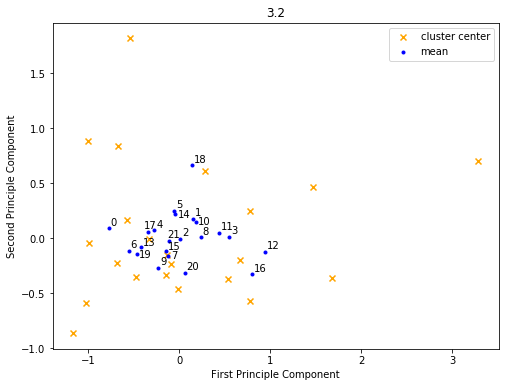

In [2]:
c_mean = np.array([])
for i in range(22):
    find_shape = find_yes(c_Xtrn, c_Ytrn, i)
    find_mean = np.mean(find_shape, axis=0)
    c_mean = np.append(c_mean, find_mean)

c_mean = c_mean.reshape(22,26)


def iaml01cw2_q3_2():
    #3.2
    pca_32 = PCA(n_components=2).fit(c_Xtrn)
    m_c_mean = pca_32.transform(c_mean)
    m_c_cluster = pca_32.transform(km_centers)
    
    plt.figure(figsize=(8,6))
    plt.scatter(m_c_cluster[:,0], m_c_cluster[:,1],c = 'orange', marker = 'x', cmap='coolwarm', label = 'cluster center')
    plt.scatter(m_c_mean[:,0], m_c_mean[:,1], marker = '.', c='blue', label = 'mean')
    plt.legend()
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    plt.title("3.2")
    
    the_co = 'black'
    
    plt.annotate(s = 0,xy = (m_c_mean[:,0][0] + 0.02 , m_c_mean[:,1][0] + 0.03), color = the_co)
    plt.annotate(s = 1,xy = (m_c_mean[:,0][1] + 0.02 , m_c_mean[:,1][1] + 0.03), color = the_co)
    plt.annotate(s = 2,xy = (m_c_mean[:,0][2] + 0.02 , m_c_mean[:,1][2] + 0.03), color = the_co)
    plt.annotate(s = 3,xy = (m_c_mean[:,0][3] + 0.02 , m_c_mean[:,1][3] + 0.03), color = the_co)
    plt.annotate(s = 4,xy = (m_c_mean[:,0][4] + 0.03 , m_c_mean[:,1][4] + 0.03), color = the_co)
    plt.annotate(s = 5,xy = (m_c_mean[:,0][5] + 0.02 , m_c_mean[:,1][5] + 0.03), color = the_co)
    plt.annotate(s = 6,xy = (m_c_mean[:,0][6] + 0.02 , m_c_mean[:,1][6] + 0.03), color = the_co)
        
    plt.annotate(s = 7,xy = (m_c_mean[:,0][7] + 0.04 , m_c_mean[:,1][7] - 0.02), color = the_co)
    
    plt.annotate(s = 8,xy = (m_c_mean[:,0][8] + 0.02 , m_c_mean[:,1][8] + 0.03), color = the_co)
    plt.annotate(s = 9,xy = (m_c_mean[:,0][9] + 0.02 , m_c_mean[:,1][9] + 0.03), color = the_co)
    
    plt.annotate(s = 10,xy = (m_c_mean[:,0][10] + 0.02 , m_c_mean[:,1][10] - 0.02), color = the_co)
    
    plt.annotate(s = 11,xy = (m_c_mean[:,0][11] + 0.02 , m_c_mean[:,1][11] + 0.03), color = the_co)
    plt.annotate(s = 12,xy = (m_c_mean[:,0][12] + 0.02 , m_c_mean[:,1][12] + 0.03), color = the_co)
    plt.annotate(s = 13,xy = (m_c_mean[:,0][13] + 0.02 , m_c_mean[:,1][13] + 0.01), color = the_co)
    
    plt.annotate(s = 14,xy = (m_c_mean[:,0][14] + 0.04 , m_c_mean[:,1][14] - 0.03), color = the_co)
    
    plt.annotate(s = 15,xy = (m_c_mean[:,0][15] + 0.03 , m_c_mean[:,1][15] + 0.01), color = the_co)
    
    plt.annotate(s = 16,xy = (m_c_mean[:,0][16] + 0.02 , m_c_mean[:,1][16] + 0.03), color = the_co)
    plt.annotate(s = 17,xy = (m_c_mean[:,0][17] - 0.05 , m_c_mean[:,1][17] + 0.04), color = the_co)
    plt.annotate(s = 18,xy = (m_c_mean[:,0][18] + 0.02 , m_c_mean[:,1][18] + 0.03), color = the_co)
    plt.annotate(s = 19,xy = (m_c_mean[:,0][19] + 0.02 , m_c_mean[:,1][19] - 0.03), color = the_co)
    plt.annotate(s = 20,xy = (m_c_mean[:,0][20] + 0.02 , m_c_mean[:,1][20] + 0.03), color = the_co)
    plt.annotate(s = 21,xy = (m_c_mean[:,0][21] - 0.02 , m_c_mean[:,1][21] + 0.04), color = the_co)
        
iaml01cw2_q3_2()

# Q3.3

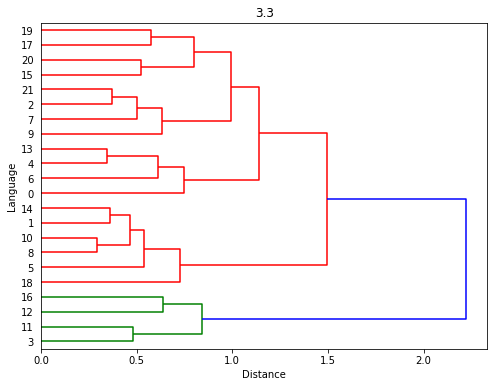

In [3]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

def iaml01cw2_q3_3():
    ward_33 = hierarchy.ward(c_mean)

    plt.figure(figsize=(8,6))
    toto = hierarchy.dendrogram(ward_33, orientation = 'right')
    plt.xlabel('Distance')
    plt.ylabel('Language')
    plt.title("3.3")
    
iaml01cw2_q3_3()

# Q3.4

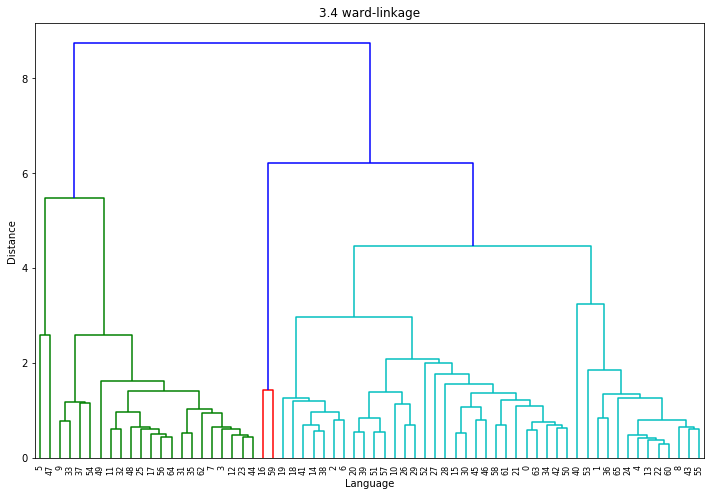

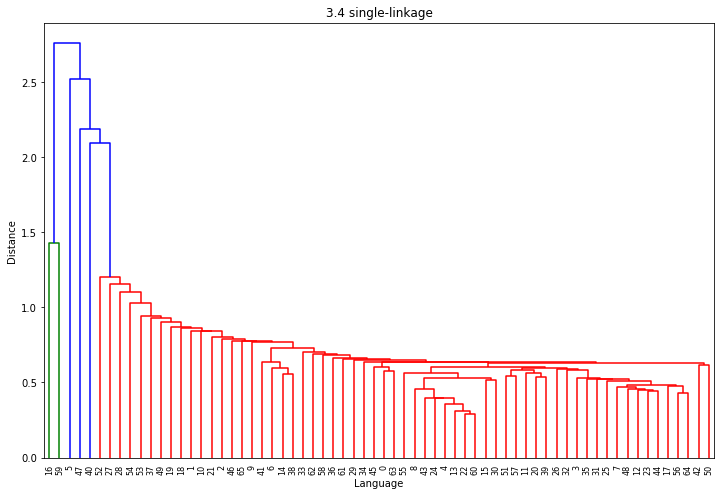

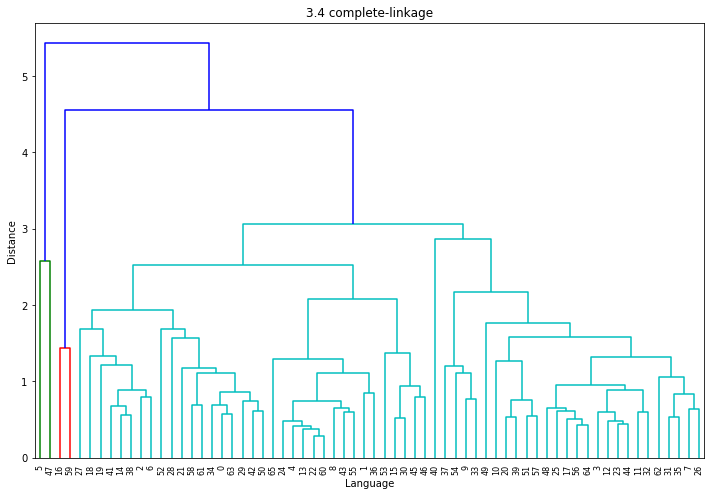

In [4]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

store = np.array([])
for c in range(22):
    km_34 = KMeans(n_clusters=3, random_state=1).fit(find_yes(c_Xtrn, c_Ytrn, c))
    km_34_centers = km_34.cluster_centers_
    store = np.append(store, km_34_centers)
store = store.reshape(66,26)
take_ward = hierarchy.ward(store)

def iaml01cw2_q3_4():
    plt.figure(figsize=(12,8))
    nana = hierarchy.dendrogram(take_ward, orientation = 'top', leaf_font_size = 8)
    plt.ylabel('Distance')
    plt.xlabel('Language')
    plt.title("3.4 ward-linkage")
    
    take_sin = hierarchy.single(store)

    plt.figure(figsize=(12,8))
    dsjo = hierarchy.dendrogram(take_sin, orientation = 'top', leaf_font_size = 8)
    plt.ylabel('Distance')
    plt.xlabel('Language')
    plt.title("3.4 single-linkage")
    
    take_com = hierarchy.complete(store)

    plt.figure(figsize=(12,8))
    sdosd = hierarchy.dendrogram(take_com, orientation = 'top', leaf_font_size = 8)
    plt.ylabel('Distance')
    plt.xlabel('Language')
    plt.title('3.4 complete-linkage')
    
iaml01cw2_q3_4()

# Q3.5

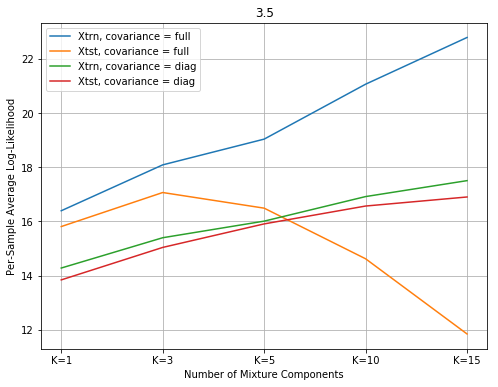

In [5]:
from sklearn import mixture

lan0 = find_yes(c_Xtrn, c_Ytrn, 0)
lan0_tst = find_yes(c_Xtst, c_Ytst, 0)
K = np.array([1,3,5,10,15])

gmmf_1 = mixture.GaussianMixture(n_components=K[0], covariance_type='full', random_state = 1).fit(lan0)
gmmd_1 = mixture.GaussianMixture(n_components=K[0], covariance_type='diag',random_state = 1).fit(lan0)

gmmf_3 = mixture.GaussianMixture(n_components=K[1], covariance_type='full',random_state = 1).fit(lan0)
gmmd_3 = mixture.GaussianMixture(n_components=K[1], covariance_type='diag',random_state = 1).fit(lan0)

gmmf_5 = mixture.GaussianMixture(n_components=K[2], covariance_type='full',random_state = 1).fit(lan0)
gmmd_5 = mixture.GaussianMixture(n_components=K[2], covariance_type='diag',random_state = 1).fit(lan0)

gmmf_10 = mixture.GaussianMixture(n_components=K[3], covariance_type='full',random_state = 1).fit(lan0)
gmmd_10 = mixture.GaussianMixture(n_components=K[3], covariance_type='diag',random_state = 1).fit(lan0)

gmmf_15 = mixture.GaussianMixture(n_components=K[4], covariance_type='full',random_state = 1).fit(lan0)
gmmd_15 = mixture.GaussianMixture(n_components=K[4], covariance_type='diag',random_state = 1).fit(lan0)

gmmf_sc_tr = np.array([
    gmmf_1.score(lan0),
    gmmf_3.score(lan0),
    gmmf_5.score(lan0),
    gmmf_10.score(lan0),
    gmmf_15.score(lan0)])

gmmd_sc_tr = np.array([
    gmmd_1.score(lan0),
    gmmd_3.score(lan0),
    gmmd_5.score(lan0),
    gmmd_10.score(lan0),
    gmmd_15.score(lan0)])

gmmf_sc_ts = np.array([
    gmmf_1.score(lan0_tst),
    gmmf_3.score(lan0_tst),
    gmmf_5.score(lan0_tst),
    gmmf_10.score(lan0_tst),
    gmmf_15.score(lan0_tst)])

gmmd_sc_ts = np.array([
    gmmd_1.score(lan0_tst),
    gmmd_3.score(lan0_tst),
    gmmd_5.score(lan0_tst),
    gmmd_10.score(lan0_tst),
    gmmd_15.score(lan0_tst)])

the_so = np.array(['K=1','K=3','K=5','K=10','K=15'])
def iaml01cw2_q3_5():
    plt.figure(figsize=(8,6))
    plt.plot(the_so, gmmf_sc_tr, label = 'Xtrn, covariance = full')
    plt.plot(the_so, gmmf_sc_ts, label = 'Xtst, covariance = full')
    plt.plot(the_so, gmmd_sc_tr, label = 'Xtrn, covariance = diag')
    plt.plot(the_so, gmmd_sc_ts, label = 'Xtst, covariance = diag')
    plt.xlabel('Number of Mixture Components')
    plt.ylabel('Per-Sample Average Log-Likelihood')
    plt.title("3.5")
    plt.grid()
    plt.legend()
iaml01cw2_q3_5()